In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance Dataset.csv')
data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [3]:
#CONVERTING OBJECT TYPE TO INT TYPE
data.replace({'Days_spend_hsptl': '120 +'}, 121, inplace=True)
data['Days_spend_hsptl'].dtypes

dtype('O')

In [4]:
data.Days_spend_hsptl = data.Days_spend_hsptl.astype('int')
data.Days_spend_hsptl.dtype

dtype('int32')

In [5]:
data.rename(columns={'Hospital County':'Hospital_County','Emergency dept_yes/No':'Emergency_dept','Home or self care,':'Home_or_self_care'},inplace=True)
data.head()

,Area_Service,Hospital_County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [6]:
data_dup=data.drop_duplicates(subset=None, keep='first', inplace=False)
data_dup.shape

(1043761, 24)

In [34]:
insurance_data_1 = data_dup.dropna()
insurance_data_1.head(50)

,Area_Service,Hospital_County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
5,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,1386.10,1919.46,1.384794,1,1
6,Western NY,Allegany,37.0,18 to 29,M,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,3373.10,3597.63,1.066565,1,1
7,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,1,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,1190.75,1632.70,1.371150,1,1
8,Western NY,Allegany,37.0,0 to 17,M,White,Not Span/Hispanic,1,Elective,Home or Self Care,...,1.0,Medical,0,N,N,528.04,596.04,1.128782,1,1
9,Western NY,Allegany,37.0,50 to 69,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,2661.61,2901.41,1.090095,0,1


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lable = LabelEncoder()
insurance_data_1['Hospital_County']       = lable.fit_transform(insurance_data_1['Hospital_County'])
insurance_data_1['Age']                   = lable.fit_transform(insurance_data_1['Age'])
insurance_data_1['Gender']                = lable.fit_transform(insurance_data_1['Gender'])
insurance_data_1['Admission_type']        = lable.fit_transform(insurance_data_1['Admission_type'])
insurance_data_1['apr_drg_description']   = lable.fit_transform(insurance_data_1['apr_drg_description'])
insurance_data_1['Surg_Description']      = lable.fit_transform(insurance_data_1['Surg_Description'])
insurance_data_1['Emergency_dept']        = lable.fit_transform(insurance_data_1['Emergency_dept'])

In [10]:
insurance_data_2=insurance_data_1.drop(['Hospital_County','Area_Service','Hospital Id','Cultural_group','ethnicity','Weight_baby','Abortion','Home_or_self_care','ccs_procedure_code','apr_drg_description','ratio_of_total_costs_to_total_charges'],axis=1)
insurance_data_2.head(60)

,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Mortality risk,Surg_Description,Emergency_dept,Tot_charg,Tot_cost,Result,Payment_Typology
0,2,0,4,0,122,1,1.0,0,1,5511.95,5582.49,1,1
1,4,0,4,5,197,3,2.0,0,1,4783.20,5162.82,1,1
2,2,0,3,5,122,1,1.0,0,1,3829.15,4056.52,1,1
3,0,0,1,5,122,1,1.0,0,1,1108.20,1644.75,0,1
4,4,0,3,0,122,2,3.0,0,1,3418.18,3370.87,1,1
5,0,0,1,0,142,1,1.0,0,1,1386.10,1919.46,1,1
6,1,1,3,0,122,2,1.0,0,1,3373.10,3597.63,1,1
7,4,0,1,0,154,2,3.0,0,1,1190.75,1632.70,1,1
8,0,1,1,0,125,1,1.0,0,0,528.04,596.04,1,1
9,3,1,2,0,122,2,1.0,0,1,2661.61,2901.41,0,1


In [11]:
insurance_data_2.shape

(1041265, 13)

# Model Building

In [12]:
X = insurance_data_2.drop(['Result'],axis=1)
y = insurance_data_2[['Result']]

In [13]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='minority')
X_os, y_os = os.fit_resample(X, y)
X_os.shape,y_os.shape

((1560722, 12), (1560722, 1))

In [14]:
y_os.value_counts()

Result
0         780361
1         780361
dtype: int64

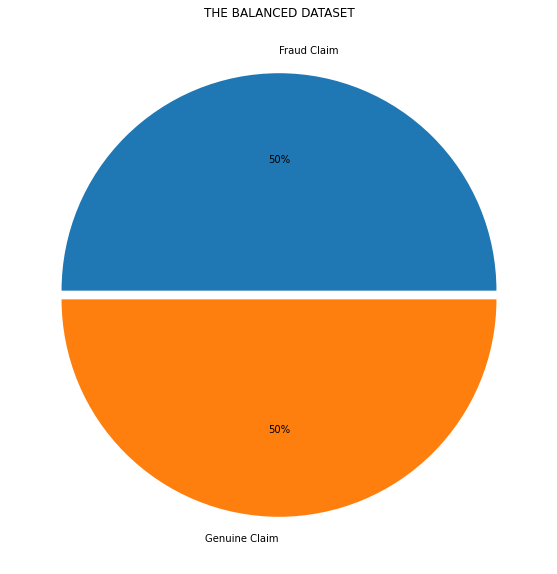

In [15]:
plt.figure(figsize=(10,10))
plt.pie(y_os.value_counts(),labels=['Fraud Claim','Genuine Claim'],explode=[0.02,0.02],autopct='%1.0f%%')
plt.title("THE BALANCED DATASET")
plt.show()

In [16]:
# splitting the data into training and testing
# training data = 80%
# testing data  = 20%
# splitting the data by using train-test-split method

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.20,random_state=123,stratify=y_os)

In [21]:
X_train.shape,y_train.shape

((1248577, 12), (1248577, 1))

In [22]:
%%time
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=123)
rf_classifier.fit(X_train,y_train)

Wall time: 5min 19s


RandomForestClassifier(n_estimators=50, random_state=123)

In [23]:
y_pred_train = rf_classifier.predict(X_train)

In [24]:
print('Accuracy score:',accuracy_score(y_train,y_pred_train))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train))
print('....................................................')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy score: 0.9910442047226563
....................................................
Confusion matrix:
 [[620728   3560]
 [  7622 616667]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    624288
           1       0.99      0.99      0.99    624289

    accuracy                           0.99   1248577
   macro avg       0.99      0.99      0.99   1248577
weighted avg       0.99      0.99      0.99   1248577



In [25]:
y_pred_test = rf_classifier.predict(X_test)

In [26]:
print('Accuracy score:',accuracy_score(y_test,y_pred_test))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test))
print('....................................................')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy score: 0.8638709574076151
....................................................
Confusion matrix:
 [[142756  13317]
 [ 29175 126897]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87    156073
           1       0.91      0.81      0.86    156072

    accuracy                           0.86    312145
   macro avg       0.87      0.86      0.86    312145
weighted avg       0.87      0.86      0.86    312145



In [27]:
input_data = (2,0,4,0,122,1,1.0,0,1,5511.95,5582.49,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The claim is fraud')
else:
  print('The claim is genuine')

[0]
The claim is fraud


In [28]:
import pickle

In [29]:
filename = 'final_model.sav'
pickle.dump(rf_classifier,open(filename,'wb'))

In [30]:
#loading the saved model

In [31]:
loaded_model = pickle.load(open('final_model.sav','rb'))

In [32]:
input_data = (2,0,4,0,122,1,1.0,0,1,5511.95,5582.49,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The claim is fraud')
else:
  print('The claim is genuine')

[0]
The claim is fraud


In [33]:
loaded_model

RandomForestClassifier(n_estimators=50, random_state=123)